In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from pairwise.src.pairwise_fitter import Pairwise_fitter
from pairwise.src.pairwise_evaluator import Pairwise_evaluator
import importlib
import src.paper_utils as utils
import src.plot as myplot
import pairwise.src.pairwise_utils as pwutils
import networkx as nx

In [3]:
importlib.reload(myplot)
importlib.reload(utils)
importlib.reload(pwutils)

<module 'pairwise.src.pairwise_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots_pw/../../pairwise/src/pairwise_utils.py'>

In [4]:
nspin = 121

path = "../data/INPUT_all/data/combined_data/full-images-unlabeled-{}.dat"

traindatas = [np.genfromtxt(path.format(digit), dtype=int, delimiter=1) for digit in range(10)]
traindatas[0].shape

(6315, 121)

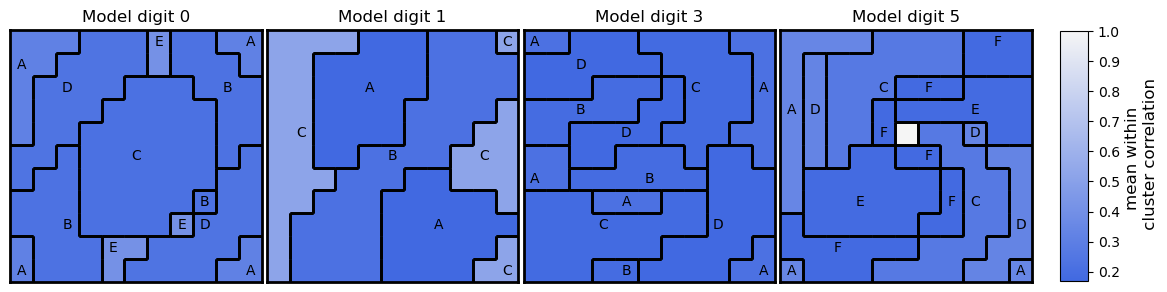

In [7]:

# plt.imshow(correl)
# plt.figure()


# plt.title(f"Model digit {dig}. Louvain on correlation graph. Based on N={sample_size}")
# im = myplot.partition_map(plt.gca(),np.array(lcomm_w_log)[pmap],myplot.int_to_letters(pmap),myplot.find_borders(pmap),cbar=None)
# colorbar = plt.colorbar(im,label="log mean within community coupling")

# --------
# take community pixels, and extract fields and within community couplings
# then just steal these 3 functions (energy, couplings, fields) here and change their arguments
# then provide the states this community sees and calculate energy
# do for all states in training data and compute average
# do this for all communities
# """Compute -1*sum(J_ij*s[i]*s[j]) for all (i,j) with i < j.

importlib.reload(utils)
cmap = myplot.cmap_to_gray("royalblue", reverse=False)

fig, axs = plt.subplots(1,4, figsize=(14,5))
axs = axs.flatten()
all_commE = []

all_pmap = []
all_commC = []
for i, dig in enumerate([0,1,3,5]):
    correl = np.corrcoef(traindatas[dig].T)
    G = nx.from_numpy_array(correl)
    pmap,lcom = utils.cluster_partmap(G,42,return_lcom=True)
    lcomm_w = np.array([utils.community_avgJij(G, com) for com in lcom])
    lcomm_w_log = np.where(np.array(lcomm_w) != 0, np.log(np.array(lcomm_w)), 0)

    all_pmap.append(pmap)
    all_commC.append(np.array(lcomm_w)[pmap])

global_vbounds = (np.array(all_commC).min(), np.array(all_commC).max())

for i, dig in enumerate([0,1,3,5]):
    ax = axs[i]
    ax.set_title(f"Model digit {dig}")
    im = myplot.partition_map(ax, all_commC[i],None,myplot.find_borders(all_pmap[i]),cbar=None, normalise=False, cmap=cmap, global_vbounds=global_vbounds)
    myplot.label_communities_ace(all_pmap[i],ax,myplot.int_to_letters(np.arange(0, all_pmap[i].max()+1)),color="black") 


fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.83,
                    wspace=0.02, hspace=0.02)
cbar_ax = fig.add_axes([0.85, 0.25, 0.02, 0.5])

cbar = fig.colorbar(im, cax=cbar_ax,)
cbar.set_label('mean within \n cluster correlation', fontsize=12)


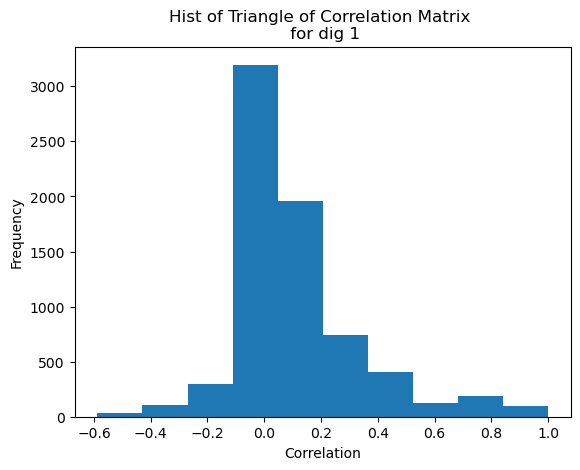

In [ ]:
upper_triangle = np.triu(correl)
upper_triangle = upper_triangle[np.nonzero(upper_triangle)]
plt.hist(upper_triangle, bins=10)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title(f'Hist of Triangle of Correlation Matrix \n for dig {dig}')
plt.show()